<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/numericalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Mechanics: Essential Numerical Techniques
## A Comprehensive Jupyter Notebook


### Learning Objectives:
After completing this notebook, students will be able to:
1. Apply numerical differentiation to analyze kinematics data
2. Use numerical integration to calculate work and energy
3. Solve first-order ODEs for exponential decay and terminal velocity
4. Solve second-order ODEs for oscillators and projectile motion
5. Select appropriate numerical methods for different physics problems
6. Understand the trade-offs between accuracy and computational cost

### Prerequisites:
- Basic Python programming (variables, functions, loops)
- Introductory classical mechanics (Newton's laws, energy, oscillations)
- Calculus (derivatives, integrals)



In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters for publication-quality figures
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['grid.alpha'] = 0.3

# SECTION 1: NUMERICAL DIFFERENTIATION


MOTIVATION FROM PHYSICS:

In physics, we often measure position as a function of time and need
to determine velocity and acceleration. Real data contains noise, making analytical differentiation impossible. Numerical differentiation allows us to extract meaningful kinematic information from experimental measurements.

KEY CONCEPTS:
- Forward difference approximation
- Step size selection and trade-offs
- Noise amplification in differentiation
- Applications to kinematics and experimental data

In [ ]:
# Forward Difference Method
def forward_difference(x, y):
    """
    Calculate derivative using forward difference method.

    Parameters:
    x (array): Independent variable values
    y (array): Dependent variable values

    Returns:
    x_deriv (array): x values for derivative (length n-1)
    dy_dx (array): Derivative values using forward difference
    """
    # Calculate step sizes (handle non-uniform spacing)
    dx = np.diff(x)
    dy = np.diff(y)

    # Forward difference: f'(x_i) ≈ [f(x_{i+1}) - f(x_i)] / [x_{i+1} - x_i]
    dy_dx = dy / dx

    # x values correspond to the left point of each interval
    x_deriv = x[:-1]

    return x_deriv, dy_dx

Let's put this in practice using a simple function

In [ ]:
# Example usage of forward_difference
x_simple = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_simple = np.array([0.0, 1.0, 4.0, 9.0, 16.0]) # y = x^2

x_deriv_simple, dy_dx_simple = forward_difference(x_simple, y_simple)

print("x values for derivative:", x_deriv_simple)
print("Numerical derivative (dy/dx):", dy_dx_simple)

# Expected analytical derivative for y = x^2 is dy/dx = 2x
# At x_deriv_simple = [0.0, 1.0, 2.0, 3.0], the analytical values are [0.0, 2.0, 4.0, 6.0]
# The forward difference approximates the derivative at the left point of the interval.
# So, for the interval [0, 1], the derivative is approx (1-0)/(1-0) = 1, corresponding to x=0.
# For the interval [1, 2], the derivative is approx (4-1)/(2-1) = 3, corresponding to x=1.
# For the interval [2, 3], the derivative is approx (9-4)/(3-2) = 5, corresponding to x=2.
# For the interval [3, 4], the derivative is approx (16-9)/(4-3) = 7, corresponding to x=3.
# This simple example shows that for a rapidly changing function like x^2,
# the forward difference isn't exact but provides an estimate.

x values for derivative: [0. 1. 2. 3.]
Numerical derivative (dy/dx): [1. 3. 5. 7.]


In [ ]:
# Second example using a function definition
def my_function(x):
    return np.sin(x)

x_func = np.linspace(0, 2 * np.pi, 10) # 10 points from 0 to 2pi
y_func = my_function(x_func)

x_deriv_func, dy_dx_func = forward_difference(x_func, y_func)

print("\nx values for derivative (from function):", x_deriv_func)
print("Numerical derivative (dy/dx from function):", dy_dx_func)

# Analytical derivative of sin(x) is cos(x)
# Let's compare at the derivative x values
analytical_dy_dx_func = np.cos(x_deriv_func)
print("Analytical derivative (dy/dx):", analytical_dy_dx_func)

# Note the difference due to the approximation


x values for derivative (from function): [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361]
Numerical derivative (dy/dx from function): [ 0.92072543  0.48990777 -0.17014318 -0.75058225 -0.97981554 -0.75058225
 -0.17014318  0.48990777  0.92072543]
Analytical derivative (dy/dx): [ 1.          0.76604444  0.17364818 -0.5        -0.93969262 -0.93969262
 -0.5         0.17364818  0.76604444]



--- Demonstration: Forward Difference vs Analytical ---


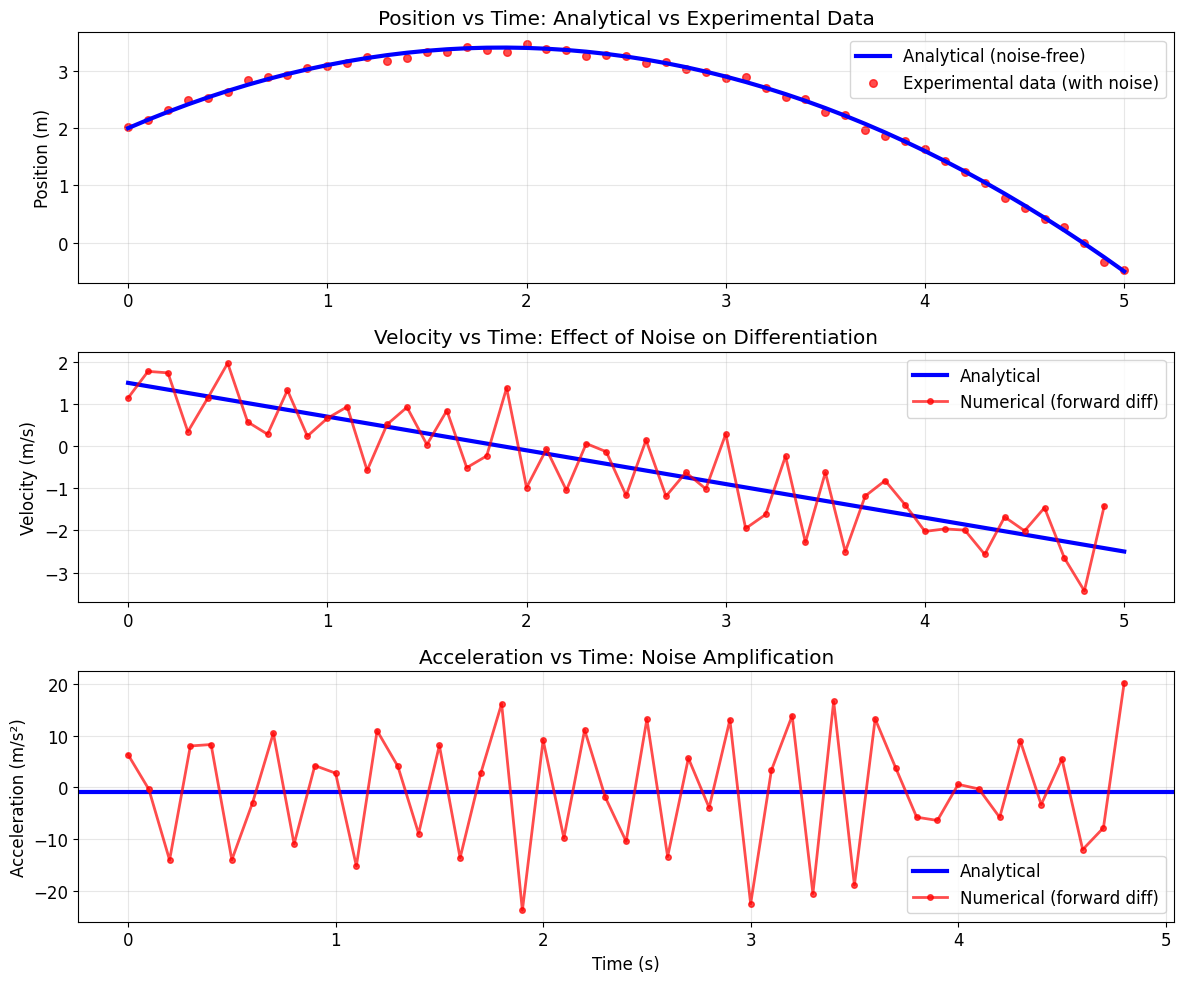

In [ ]:
# Demonstration: Analytical vs Numerical Differentiation
print("\n--- Demonstration: Forward Difference vs Analytical ---")

# Create test function: position as parabola (constant acceleration)
t_test = np.linspace(0, 5, 51)  # 51 points for smooth curve, in (s)
x0, v0, a = 2.0, 1.5, -0.8  # Initial position (m), velocity (m/s), acceleration (m/s^2)
position_analytical = x0 + v0*t_test + 0.5*a*t_test**2

# Analytical derivatives
velocity_analytical = v0 + a*t_test
acceleration_analytical = a * np.ones_like(t_test)  # np.ones_like(t_test) is an array of 1 one likes t_test, useful to multiply

# Add realistic noise to simulate experimental data
np.random.seed(42)  # For reproducible results
noise_level = 0.05  # 5cm noise in position measurement
position_noisy = position_analytical + noise_level * np.random.randn(len(t_test))

# Calculate numerical derivatives
t_vel, velocity_numerical = forward_difference(t_test, position_noisy)
t_acc, acceleration_numerical = forward_difference(t_vel, velocity_numerical)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Position plot
axes[0].plot(t_test, position_analytical, 'b-', label='Analytical (noise-free)', linewidth=3)
axes[0].scatter(t_test, position_noisy, c='red', s=30, alpha=0.7, label='Experimental data (with noise)')
axes[0].set_ylabel('Position (m)')
axes[0].set_title('Position vs Time: Analytical vs Experimental Data')
axes[0].legend()
axes[0].grid(True)

# Velocity plot
axes[1].plot(t_test, velocity_analytical, 'b-', label='Analytical', linewidth=3)
axes[1].plot(t_vel, velocity_numerical, 'ro-', markersize=4, label='Numerical (forward diff)', alpha=0.7)
axes[1].set_ylabel('Velocity (m/s)')
axes[1].set_title('Velocity vs Time: Effect of Noise on Differentiation')
axes[1].legend()
axes[1].grid(True)

# Acceleration plot
axes[2].axhline(y=acceleration_analytical[0], color='b', linewidth=3, label='Analytical')
axes[2].plot(t_acc, acceleration_numerical, 'ro-', markersize=4, label='Numerical (forward diff)', alpha=0.7)
axes[2].set_ylabel('Acceleration (m/s²)')
axes[2].set_xlabel('Time (s)')
axes[2].set_title('Acceleration vs Time: Noise Amplification')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


OBSERVATIONS:
1. Position data with small noise (5cm) leads to significant velocity scatter
2. Second derivative (acceleration) shows extreme noise amplification
3. This demonstrates why differentiation requires careful treatment of experimental data

KEY INSIGHT: Differentiation amplifies noise! This is a fundamental challenge
in experimental physics and engineering.



--- Step Size Selection Analysis ---


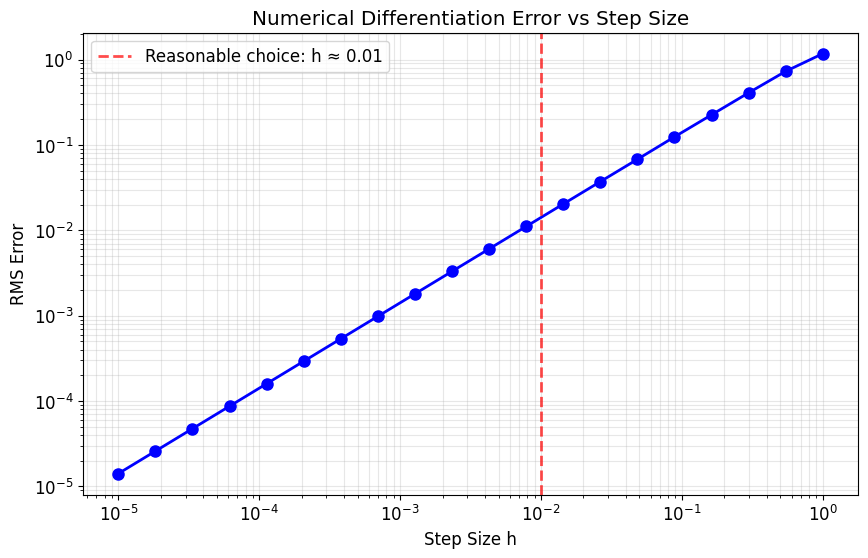

In [ ]:
# Step Size Analysis
print("\n--- Step Size Selection Analysis ---")

def analyze_step_size(func, func_deriv, x_range, step_sizes):
    """
    Analyze how step size affects numerical differentiation accuracy.
    """
    errors = []

    for h in step_sizes:
        # Create grid with specific step size
        x = np.arange(x_range[0], x_range[1] + h, h)
        y = func(x)

        # Calculate numerical derivative
        x_num, dy_num = forward_difference(x, y)

        # Analytical derivative at same points
        dy_analytical = func_deriv(x_num)

        # Calculate RMS error
        error = np.sqrt(np.mean((dy_num - dy_analytical)**2))
        errors.append(error)

    return errors

# Test function: sin(x) with known derivative cos(x)
test_func = lambda x: np.sin(2*x)
test_deriv = lambda x: 2*np.cos(2*x)

step_sizes = np.logspace(-5, 0, 20)  # From 0.001 to 1.0
errors = analyze_step_size(test_func, test_deriv, [0, np.pi], step_sizes)

plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, errors, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Step Size h')
plt.ylabel('RMS Error')
plt.title('Numerical Differentiation Error vs Step Size')
plt.grid(True, which="both", alpha=0.3)
plt.axvline(x=0.01, color='r', linestyle='--', alpha=0.7, label='Reasonable choice: h ≈ 0.01')
plt.legend()
plt.show()




STEP SIZE SELECTION GUIDELINES:
1. Too large: Truncation error dominates (poor approximation)
2. Too small: Round-off error dominates (for noisy data)
3. Optimal choice: Balance between truncation and round-off errors
4. Rule of thumb: h ≈ 0.001 to 0.01 for typical physics problems

## CHECKPOINT 1 : Understanding Derivatives
🔍 CHECKPOINT 1: Test Your Understanding
Before moving on, make sure you understand:
1. Why does differentiation amplify noise?
2. What happens to accuracy as step size decreases?
3. How would you choose step size for real experimental data?

Try modifying the noise_level variable above and re-running the demonstration!




--- Physics Application: Analyzing Real Motion Data ---


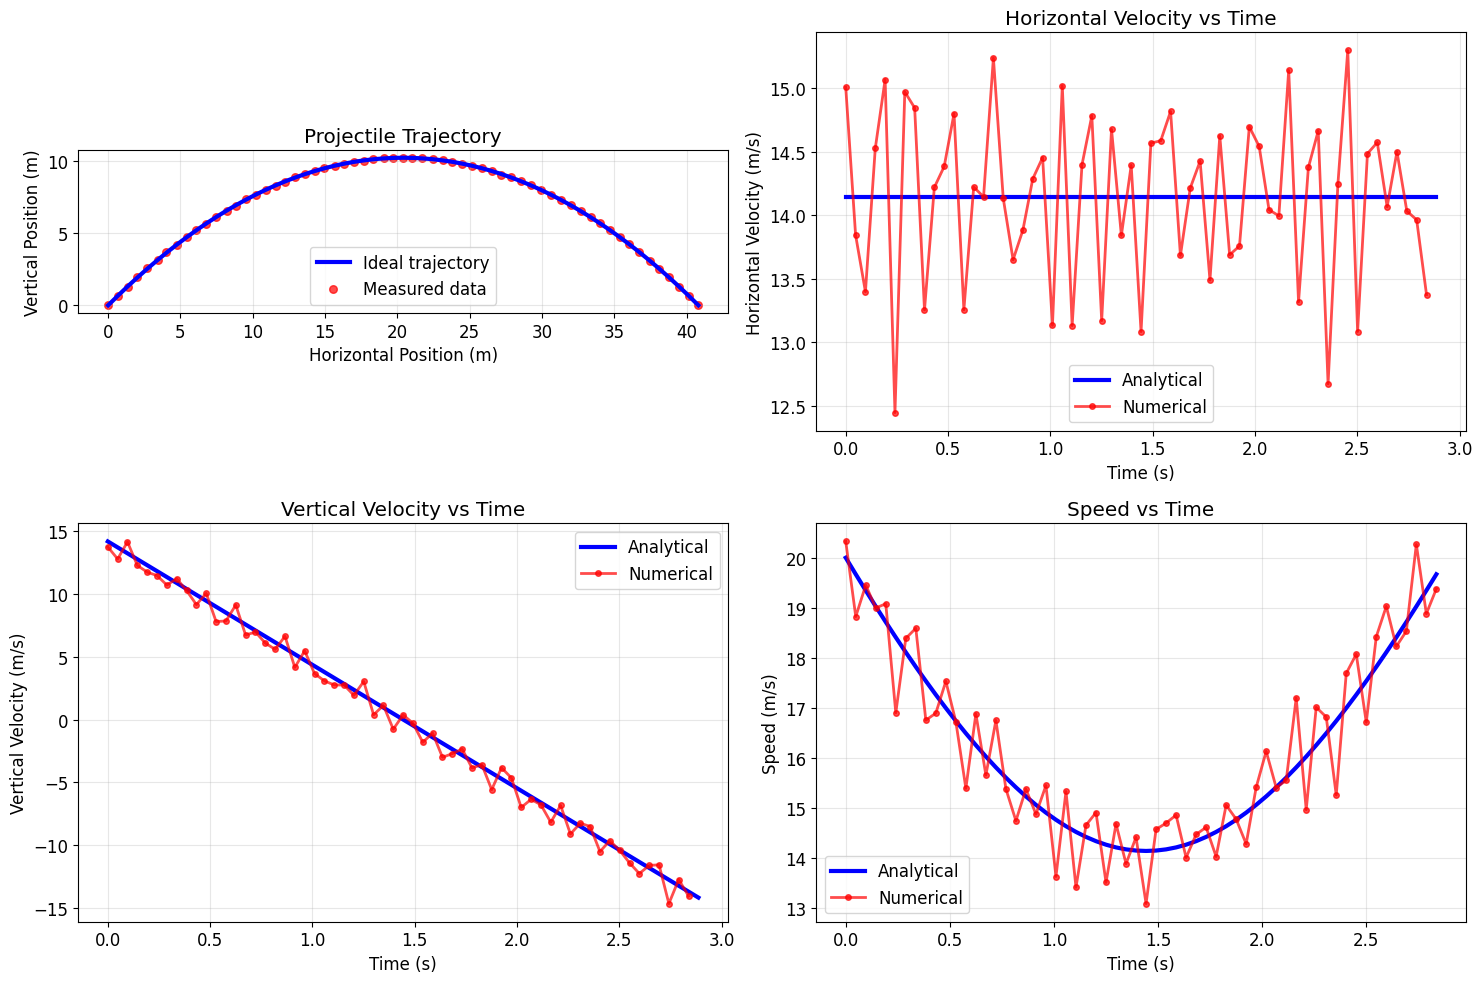

PHYSICS ANALYSIS RESULTS:
Initial horizontal velocity: 14.14 ± 0.66 m/s
Expected: 14.14 m/s
Initial vertical velocity: 13.71 m/s
Expected: 14.14 m/s
Estimated gravitational acceleration: 9.79 m/s²
Expected: 9.80 m/s²
Error: 0.1%


In [ ]:

# Physics Application: Kinematics Analysis
print("\n--- Physics Application: Analyzing Real Motion Data ---")

# Simulate realistic projectile motion data
def create_projectile_data():
    """Create realistic projectile motion data with measurement noise."""
    # Parameters
    v0 = 20.0  # m/s initial speed
    theta = 45.0 * np.pi/180  # launch angle
    g = 9.80  # m/s^2

    # Time points (typical video analysis: 30 fps)
    t_real = np.linspace(0, 2*v0*np.sin(theta)/g, 61)

    # Ideal trajectory
    x_ideal = v0 * np.cos(theta) * t_real
    y_ideal = v0 * np.sin(theta) * t_real - 0.5 * g * t_real**2

    # Add measurement uncertainty (typical for video analysis)
    np.random.seed(123)
    x_measured = x_ideal + 0.02 * np.random.randn(len(t_real))  # 2cm uncertainty
    y_measured = y_ideal + 0.02 * np.random.randn(len(t_real))

    return t_real, x_measured, y_measured, x_ideal, y_ideal

t, x_meas, y_meas, x_ideal, y_ideal = create_projectile_data()

# Calculate velocities using numerical differentiation
t_vel, vx_num = forward_difference(t, x_meas)
_, vy_num = forward_difference(t, y_meas)

# Analytical velocities for comparison
v0 = 20.0
theta = 45.0 * np.pi/180
g = 9.80
vx_analytical = v0 * np.cos(theta) * np.ones_like(t)
vy_analytical = v0 * np.sin(theta) - g * t

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Trajectory plot
axes[0, 0].plot(x_ideal, y_ideal, 'b-', linewidth=3, label='Ideal trajectory')
axes[0, 0].scatter(x_meas, y_meas, c='red', s=30, alpha=0.7, label='Measured data')
axes[0, 0].set_xlabel('Horizontal Position (m)')
axes[0, 0].set_ylabel('Vertical Position (m)')
axes[0, 0].set_title('Projectile Trajectory')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_aspect('equal')

# Horizontal velocity
axes[0, 1].plot(t, vx_analytical, 'b-', linewidth=3, label='Analytical')
axes[0, 1].plot(t_vel, vx_num, 'ro-', markersize=4, alpha=0.7, label='Numerical')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Horizontal Velocity (m/s)')
axes[0, 1].set_title('Horizontal Velocity vs Time')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Vertical velocity
axes[1, 0].plot(t, vy_analytical, 'b-', linewidth=3, label='Analytical')
axes[1, 0].plot(t_vel, vy_num, 'ro-', markersize=4, alpha=0.7, label='Numerical')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Vertical Velocity (m/s)')
axes[1, 0].set_title('Vertical Velocity vs Time')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Speed magnitude
speed_num = np.sqrt(vx_num**2 + vy_num**2)
speed_analytical = np.sqrt(vx_analytical[:-1]**2 + vy_analytical[:-1]**2)
axes[1, 1].plot(t_vel, speed_analytical, 'b-', linewidth=3, label='Analytical')
axes[1, 1].plot(t_vel, speed_num, 'ro-', markersize=4, alpha=0.7, label='Numerical')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Speed (m/s)')
axes[1, 1].set_title('Speed vs Time')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Calculate and display physics insights
print("PHYSICS ANALYSIS RESULTS:")
print(f"Initial horizontal velocity: {np.mean(vx_num):.2f} ± {np.std(vx_num):.2f} m/s")
print(f"Expected: {v0*np.cos(theta):.2f} m/s")
print(f"Initial vertical velocity: {vy_num[0]:.2f} m/s")
print(f"Expected: {v0*np.sin(theta):.2f} m/s")

# Estimate gravitational acceleration from vertical velocity slope
# Using linear regression on vy vs t
coeffs = np.polyfit(t_vel, vy_num, 1)
g_estimated = -coeffs[0]
print(f"Estimated gravitational acceleration: {g_estimated:.2f} m/s²")
print(f"Expected: {g:.2f} m/s²")
print(f"Error: {abs(g_estimated - g)/g * 100:.1f}%")



# SECTION 2: NUMERICAL INTEGRATION


MOTIVATION FROM PHYSICS:
Integration appears everywhere in physics: calculating work done by variable forces,
finding energy from power, determining center of mass, and analyzing experimental
data. When analytical integration is impossible or when working with discrete data,
numerical integration becomes essential.

KEY CONCEPTS:
- Trapezoidal rule for smooth functions
- Handling experimental data with uneven spacing
- Accuracy considerations and convergence
- Applications to work, energy, and experimental analysis



--- Demonstration: Trapezoidal Rule Accuracy ---
Analytical integral of sin(x) from 0 to π: 2.000000
n =   5: Numerical = 1.896119, Error = 1.04e-01
n =  11: Numerical = 1.983524, Error = 1.65e-02
n =  21: Numerical = 1.995886, Error = 4.11e-03
n =  51: Numerical = 1.999342, Error = 6.58e-04
n = 101: Numerical = 1.999836, Error = 1.64e-04


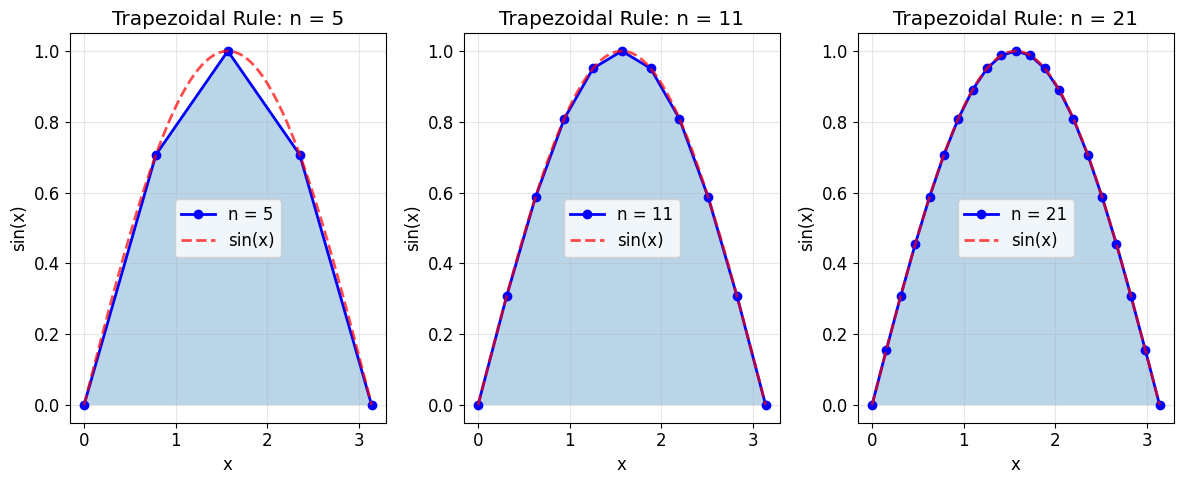

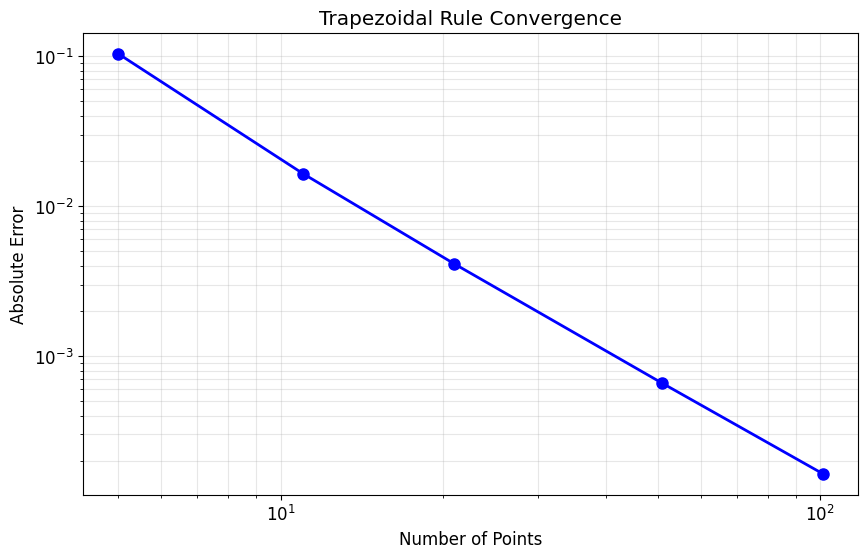

In [ ]:

def trapezoidal_rule(x, y):
    """
    Numerical integration using the trapezoidal rule.

    Parameters:
    x (array): Independent variable values (must be sorted)
    y (array): Function values at x points

    Returns:
    integral (float): Approximate integral value
    """
    # Handle non-uniform spacing
    dx = np.diff(x)
    y_avg = (y[:-1] + y[1:]) / 2.0  # Average height of each trapezoid

    # Sum of areas of all trapezoids
    integral = np.sum(dx * y_avg)

    return integral

def cumulative_integration(x, y):
    """
    Calculate cumulative integral (running sum) using trapezoidal rule.

    Returns:
    x (array): Same x values
    cum_integral (array): Cumulative integral values
    """
    cum_integral = np.zeros_like(x)

    for i in range(1, len(x)):
        # Add area of trapezoid from x[i-1] to x[i]
        dx = x[i] - x[i-1]
        area = dx * (y[i-1] + y[i]) / 2.0
        cum_integral[i] = cum_integral[i-1] + area

    return x, cum_integral

# Demonstration: Integration Accuracy
print("\n--- Demonstration: Trapezoidal Rule Accuracy ---")

# Test function with known integral: ∫sin(x)dx = -cos(x) + C
x_test = np.linspace(0, np.pi, 101)
y_test = np.sin(x_test)

# Analytical integral from 0 to π
analytical_integral = -np.cos(np.pi) + np.cos(0)  # Should be 2
print(f"Analytical integral of sin(x) from 0 to π: {analytical_integral:.6f}")

# Numerical integration with different numbers of points
n_points = [5, 11, 21, 51, 101]
errors = []

plt.figure(figsize=(12, 5))

for i, n in enumerate(n_points):
    x_n = np.linspace(0, np.pi, n)
    y_n = np.sin(x_n)

    numerical_integral = trapezoidal_rule(x_n, y_n)
    error = abs(numerical_integral - analytical_integral)
    errors.append(error)

    print(f"n = {n:3d}: Numerical = {numerical_integral:8.6f}, Error = {error:.2e}")

    # Plot for visualization
    if i < 3:  # Only plot first 3 for clarity
        plt.subplot(1, 3, i+1)
        plt.plot(x_n, y_n, 'bo-', markersize=6, label=f'n = {n}')
        plt.fill_between(x_n, 0, y_n, alpha=0.3)
        plt.plot(x_test, np.sin(x_test), 'r--', alpha=0.7, label='sin(x)')
        plt.xlabel('x')
        plt.ylabel('sin(x)')
        plt.title(f'Trapezoidal Rule: n = {n}')
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()

# Convergence analysis
plt.figure(figsize=(10, 6))
plt.loglog(n_points, errors, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Points')
plt.ylabel('Absolute Error')
plt.title('Trapezoidal Rule Convergence')
plt.grid(True, which="both", alpha=0.3)
plt.show()




CONVERGENCE BEHAVIOR:
- Trapezoidal rule error decreases as O(h²) where h is step size
- Doubling the number of points reduces error by factor of ~4
- For smooth functions, convergence is rapid and predictable


## CHECKPOINT 2: Integration Concepts

Key questions to consider:
1. Why does the trapezoidal rule work better for smooth functions?
2. How would noise in data affect numerical integration vs differentiation?
3. What happens if the data points are not evenly spaced?



--- Physics Application 1: Work Done by Variable Force ---


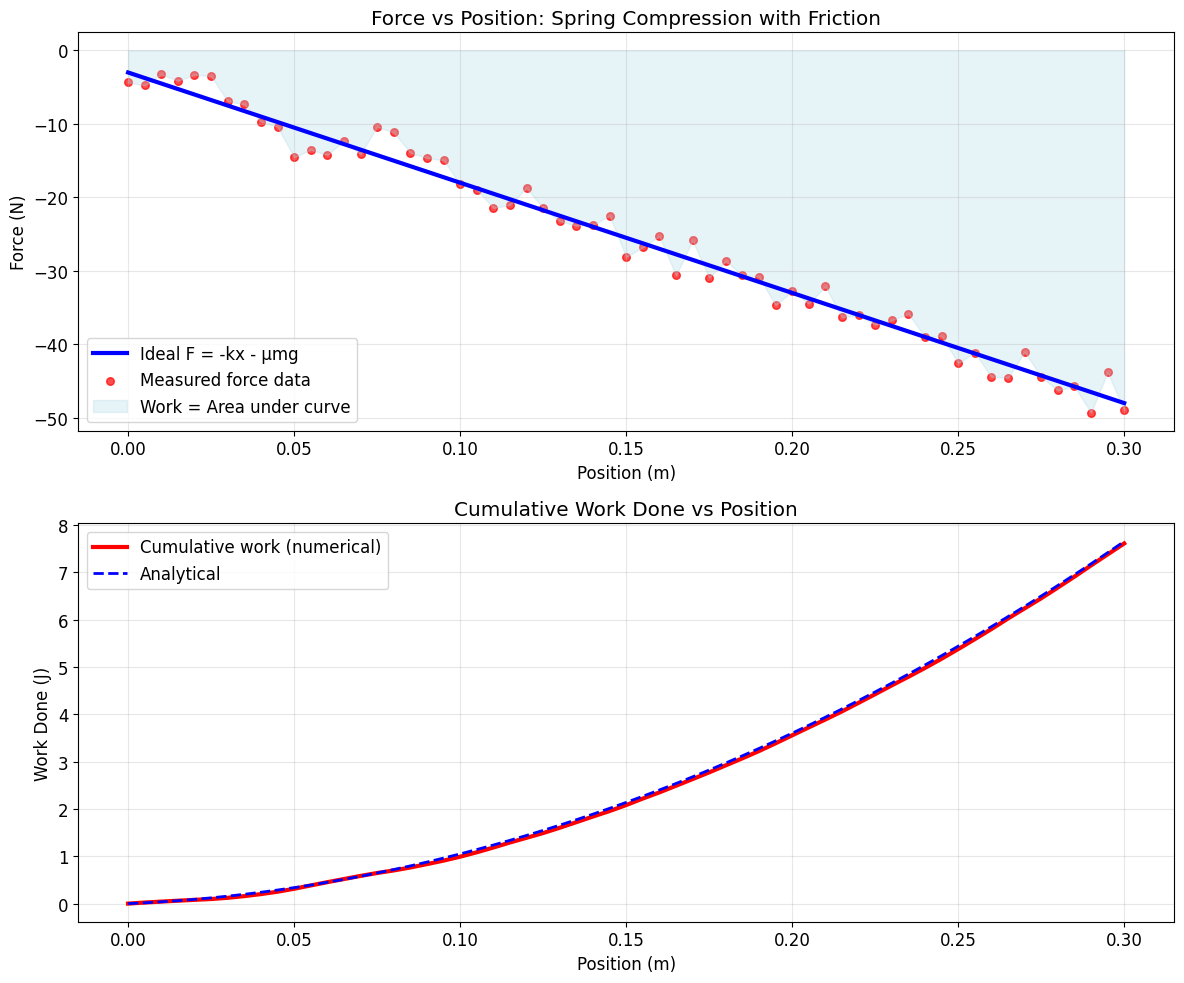

WORK CALCULATION RESULTS:
Numerical integration: 7.61 J
Analytical calculation: 7.65 J
Error: 0.04 J (0.6%)
Spring potential energy: 6.75 J
Work against friction: 0.90 J

--- Physics Application 2: Total Energy from Power vs Time ---


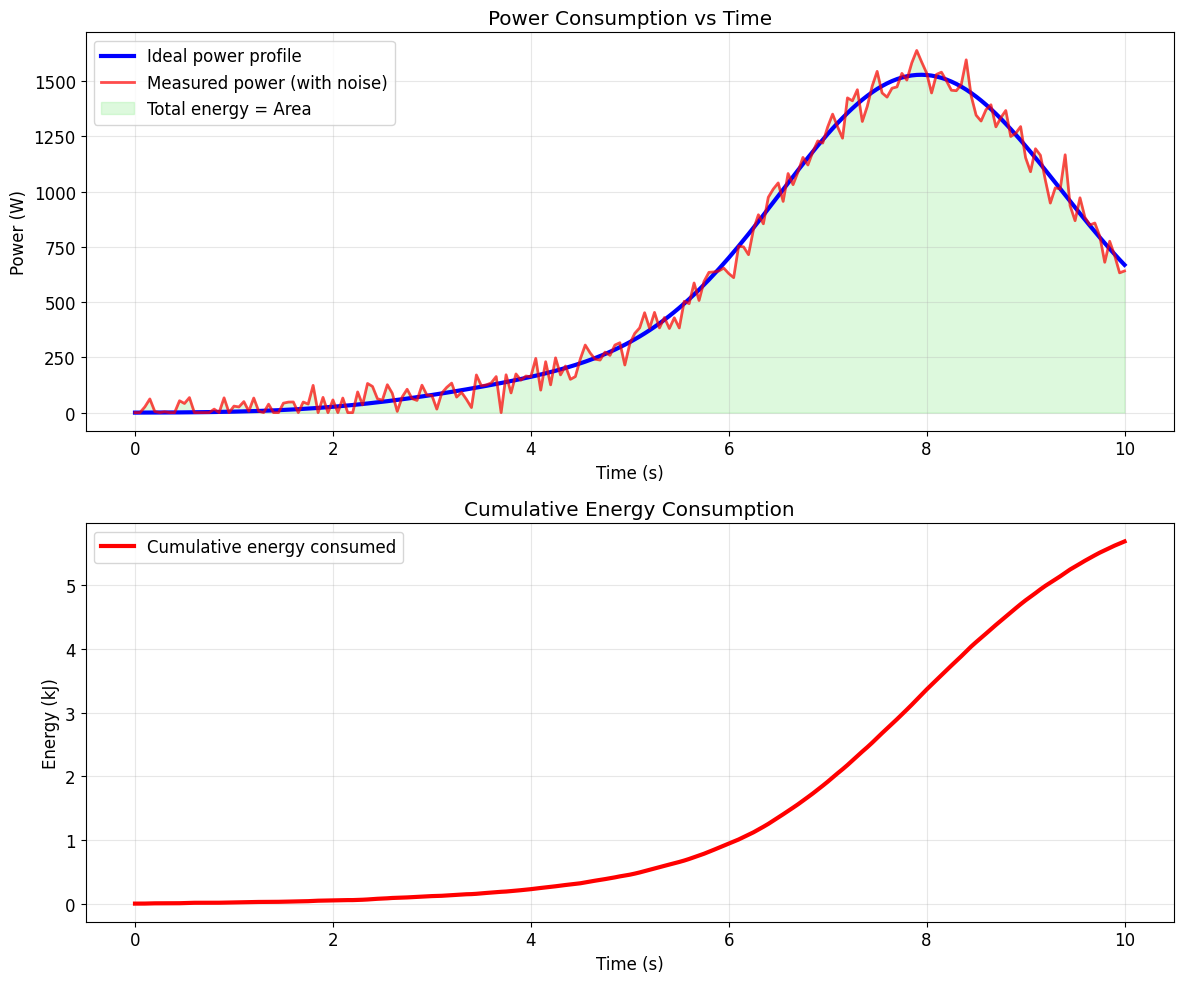

ENERGY CALCULATION RESULTS:
Total energy consumed (numerical): 5.69 kJ
Total energy consumed (ideal): 5.66 kJ
Average power: 569.1 W
Peak power: 1638.8 W


In [ ]:

# Physics Application 1: Work Done by Variable Force
print("\n--- Physics Application 1: Work Done by Variable Force ---")

# Simulate force data for a mass on a spring being compressed
# F(x) = -kx + friction force that varies with position

def spring_force_data():
    """Generate realistic force vs position data for spring compression."""
    # Parameters
    k = 150.0  # N/m spring constant
    mu_kinetic = 0.15  # kinetic friction coefficient
    mg = 20.0  # N normal force (2 kg mass)

    # Position data (compress spring from 0 to 0.3 m)
    x = np.linspace(0, 0.30, 61)  # 61 data points

    # Ideal forces
    F_spring = -k * x  # Spring restoring force
    F_friction = -mu_kinetic * mg * np.ones_like(x)  # Kinetic friction
    F_total_ideal = F_spring + F_friction

    # Add measurement noise (force sensor uncertainty)
    np.random.seed(456)
    F_measured = F_total_ideal + 2.0 * np.random.randn(len(x))  # 2N uncertainty

    return x, F_measured, F_total_ideal, k, mu_kinetic, mg

x_pos, F_meas, F_ideal, k_spring, mu, mg = spring_force_data()

# Calculate work done using numerical integration
work_numerical = -trapezoidal_rule(x_pos, F_meas)  # Negative because F opposes motion

# Analytical calculation for comparison
# W = ∫F dx = ∫(-kx - μmg) dx = -½kx² - μmg*x
x_final = x_pos[-1]
work_spring_analytical = 0.5 * k_spring * x_final**2  # Spring potential energy
work_friction_analytical = mu * mg * x_final  # Friction work
work_total_analytical = work_spring_analytical + work_friction_analytical

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Force vs position
axes[0].plot(x_pos, F_ideal, 'b-', linewidth=3, label='Ideal F = -kx - μmg')
axes[0].scatter(x_pos, F_meas, c='red', s=30, alpha=0.7, label='Measured force data')
axes[0].fill_between(x_pos, 0, F_meas, alpha=0.3, color='lightblue', label='Work = Area under curve')
axes[0].set_xlabel('Position (m)')
axes[0].set_ylabel('Force (N)')
axes[0].set_title('Force vs Position: Spring Compression with Friction')
axes[0].legend()
axes[0].grid(True)

# Cumulative work
x_cum, work_cumulative = cumulative_integration(x_pos, -F_meas)
axes[1].plot(x_cum, work_cumulative, 'r-', linewidth=3, label='Cumulative work (numerical)')

# Analytical cumulative work
work_analytical_cum = 0.5 * k_spring * x_cum**2 + mu * mg * x_cum
axes[1].plot(x_cum, work_analytical_cum, 'b--', linewidth=2, label='Analytical')
axes[1].set_xlabel('Position (m)')
axes[1].set_ylabel('Work Done (J)')
axes[1].set_title('Cumulative Work Done vs Position')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Results comparison
print("WORK CALCULATION RESULTS:")
print(f"Numerical integration: {work_numerical:.2f} J")
print(f"Analytical calculation: {work_total_analytical:.2f} J")
print(f"Error: {abs(work_numerical - work_total_analytical):.2f} J ({abs(work_numerical - work_total_analytical)/work_total_analytical*100:.1f}%)")
print(f"Spring potential energy: {work_spring_analytical:.2f} J")
print(f"Work against friction: {work_friction_analytical:.2f} J")

# Physics Application 2: Energy from Power Data
print("\n--- Physics Application 2: Total Energy from Power vs Time ---")

def power_data():
    """Generate realistic power vs time data for energy calculation."""
    # Simulate power consumption of a variable-load motor
    t = np.linspace(0, 10, 201)  # 10 seconds, 201 points

    # Power profile: startup, steady state, variable load, shutdown
    P_base = 1200  # Watts base power
    P_ideal = P_base * (1 - np.exp(-t/2)) * (1 + 0.3*np.sin(t)) * np.exp(-0.1*(t-8)**2)

    # Add measurement noise (power meter uncertainty)
    np.random.seed(789)
    P_measured = P_ideal + 50 * np.random.randn(len(t))  # 50W uncertainty
    P_measured = np.maximum(P_measured, 0)  # Power cannot be negative

    return t, P_measured, P_ideal

t_power, P_meas, P_ideal = power_data()

# Calculate total energy consumed
energy_numerical = trapezoidal_rule(t_power, P_meas)  # Energy = ∫P dt
energy_ideal = trapezoidal_rule(t_power, P_ideal)

# Calculate instantaneous energy consumption
t_energy, energy_cumulative = cumulative_integration(t_power, P_meas)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Power vs time
axes[0].plot(t_power, P_ideal, 'b-', linewidth=3, label='Ideal power profile')
axes[0].plot(t_power, P_meas, 'r-', alpha=0.7, label='Measured power (with noise)')
axes[0].fill_between(t_power, 0, P_meas, alpha=0.3, color='lightgreen', label='Total energy = Area')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Power (W)')
axes[0].set_title('Power Consumption vs Time')
axes[0].legend()
axes[0].grid(True)

# Cumulative energy
axes[1].plot(t_energy, energy_cumulative/1000, 'r-', linewidth=3, label='Cumulative energy consumed')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Energy (kJ)')
axes[1].set_title('Cumulative Energy Consumption')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("ENERGY CALCULATION RESULTS:")
print(f"Total energy consumed (numerical): {energy_numerical/1000:.2f} kJ")
print(f"Total energy consumed (ideal): {energy_ideal/1000:.2f} kJ")
print(f"Average power: {energy_numerical/t_power[-1]:.1f} W")
print(f"Peak power: {np.max(P_meas):.1f} W")



# SECTION 3: FIRST-ORDER ORDINARY DIFFERENTIAL EQUATIONS

MOTIVATION FROM PHYSICS:
Many fundamental physics phenomena are described by first-order ODEs:
- Exponential decay (radioactive decay, RC circuits, cooling)
- Terminal velocity with air resistance
- Population dynamics in biophysics
- First-order approximation of oscillators

Understanding how to solve these numerically opens up complex real-world problems where analytical solutions don't exist.

KEY CONCEPTS:
- Euler's method for initial value problems
- Step size and stability considerations
- Comparison with analytical solutions
- Physical interpretation of numerical results



--- Demonstration: Euler's Method vs Analytical Solution ---


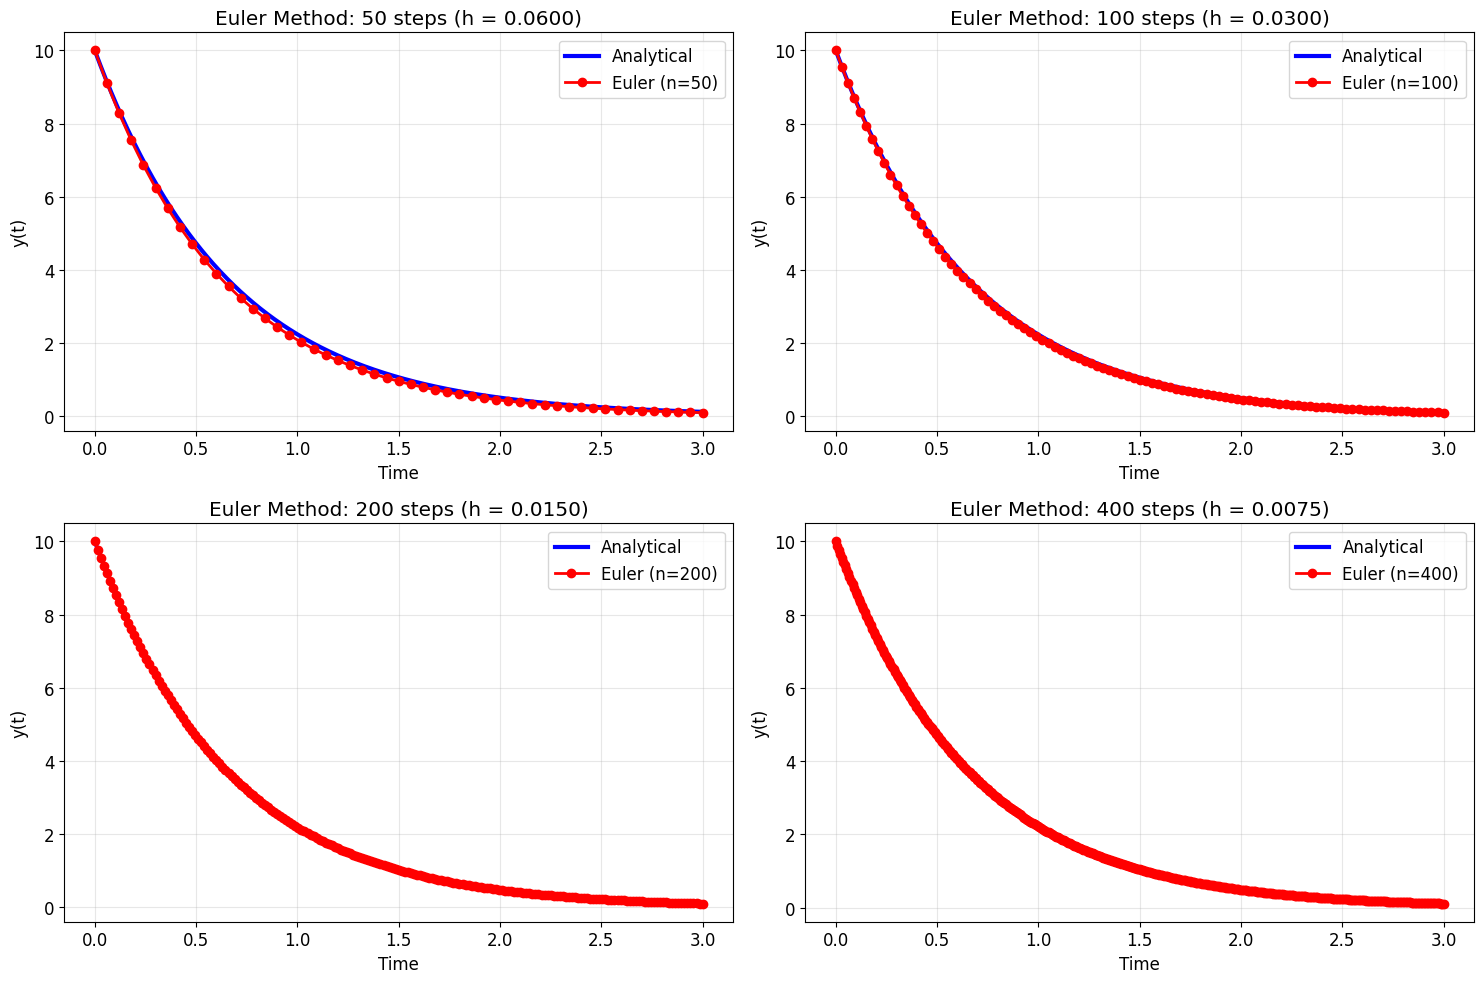


--- Error Analysis ---
n =  25, h = 0.1200, RMS Error = 2.1964e-01
n =  50, h = 0.0600, RMS Error = 1.0765e-01
n = 100, h = 0.0300, RMS Error = 5.3331e-02
n = 200, h = 0.0150, RMS Error = 2.6548e-02
n = 400, h = 0.0075, RMS Error = 1.3245e-02
n = 800, h = 0.0037, RMS Error = 6.6155e-03


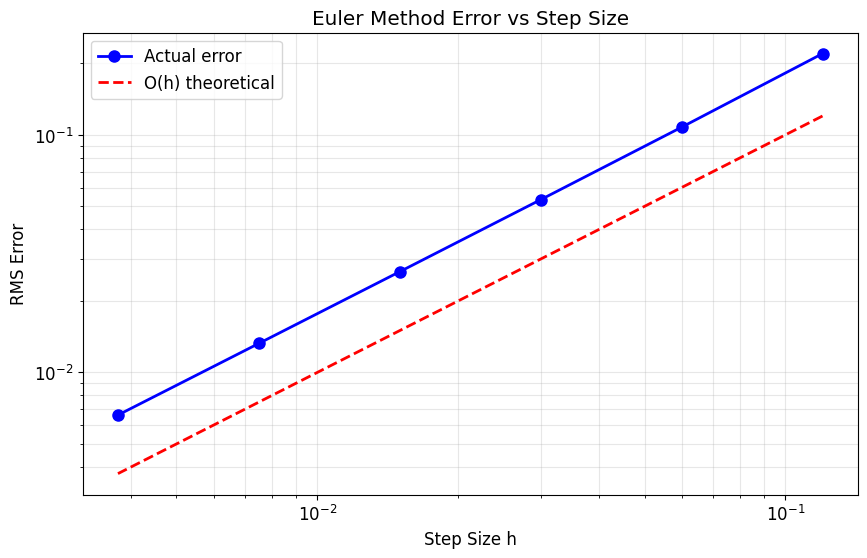

In [ ]:
def euler_method(f, t_span, y0, n_steps):
    """
    Solve first-order ODE dy/dt = f(t, y) using Euler's method.

    Parameters:
    f : function
        Right-hand side function f(t, y)
    t_span : tuple
        (t_start, t_end) integration interval
    y0 : float
        Initial condition y(t_start) = y0
    n_steps : int
        Number of integration steps

    Returns:
    t : array
        Time values
    y : array
        Solution values
    """
    t_start, t_end = t_span
    h = (t_end - t_start) / n_steps  # Step size

    # Initialize arrays
    t = np.linspace(t_start, t_end, n_steps + 1)
    y = np.zeros(n_steps + 1)
    y[0] = y0

    # Euler's method: y_{n+1} = y_n + h * f(t_n, y_n)
    for i in range(n_steps):
        y[i + 1] = y[i] + h * f(t[i], y[i])

    return t, y

# Demonstration: Method Accuracy and Stability
print("\n--- Demonstration: Euler's Method vs Analytical Solution ---")

# Test problem: exponential decay dy/dt = -λy with y(0) = y0
lambda_decay = 1.5  # decay constant
y0_test = 10.0     # initial value

def exponential_decay(t, y):
    """Right-hand side for exponential decay: dy/dt = -λy"""
    return -lambda_decay * y

# Analytical solution
def analytical_exponential(t):
    """Analytical solution: y(t) = y0 * exp(-λt)"""
    return y0_test * np.exp(-lambda_decay * t)

# Compare different step sizes
t_span = (0, 3)
step_sizes = [50, 100, 200, 400]

plt.figure(figsize=(15, 10))

for i, n_steps in enumerate(step_sizes):
    plt.subplot(2, 2, i + 1)

    # Numerical solution
    t_num, y_num = euler_method(exponential_decay, t_span, y0_test, n_steps)

    # Analytical solution for comparison
    t_analytical = np.linspace(t_span[0], t_span[1], 1000)
    y_analytical = analytical_exponential(t_analytical)

    # Plot both solutions
    plt.plot(t_analytical, y_analytical, 'b-', linewidth=3, label='Analytical')
    plt.plot(t_num, y_num, 'ro-', markersize=6, label=f'Euler (n={n_steps})')

    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.title(f'Euler Method: {n_steps} steps (h = {(t_span[1]-t_span[0])/n_steps:.4f})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Error analysis
print("\n--- Error Analysis ---")
errors = []
h_values = []

for n_steps in [25, 50, 100, 200, 400, 800]:
    t_num, y_num = euler_method(exponential_decay, t_span, y0_test, n_steps)
    y_analytical_at_points = analytical_exponential(t_num)

    # Calculate RMS error
    error = np.sqrt(np.mean((y_num - y_analytical_at_points)**2))
    errors.append(error)

    h = (t_span[1] - t_span[0]) / n_steps
    h_values.append(h)

    print(f"n = {n_steps:3d}, h = {h:.4f}, RMS Error = {error:.4e}")

# Plot error vs step size
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors, 'bo-', markersize=8, linewidth=2, label='Actual error')
plt.loglog(h_values, np.array(h_values), 'r--', linewidth=2, label='O(h) theoretical')
plt.xlabel('Step Size h')
plt.ylabel('RMS Error')
plt.title('Euler Method Error vs Step Size')
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.show()





ERROR BEHAVIOR:
- Euler's method has O(h) global error (first-order method)
- Halving step size approximately halves the error
- For very small h, round-off errors may become significant


## CHECKPOINT 3: Understanding ODEs

Critical concepts to master:
1. What does dy/dt = f(t,y) mean physically?
2. Why is Euler's method called "first-order"?
3. How do you choose appropriate step size?
4. What happens if the step size is too large?

Try changing lambda_decay and y0_test above to see how solutions change!


--- Physics Application 1: Radioactive Decay ---


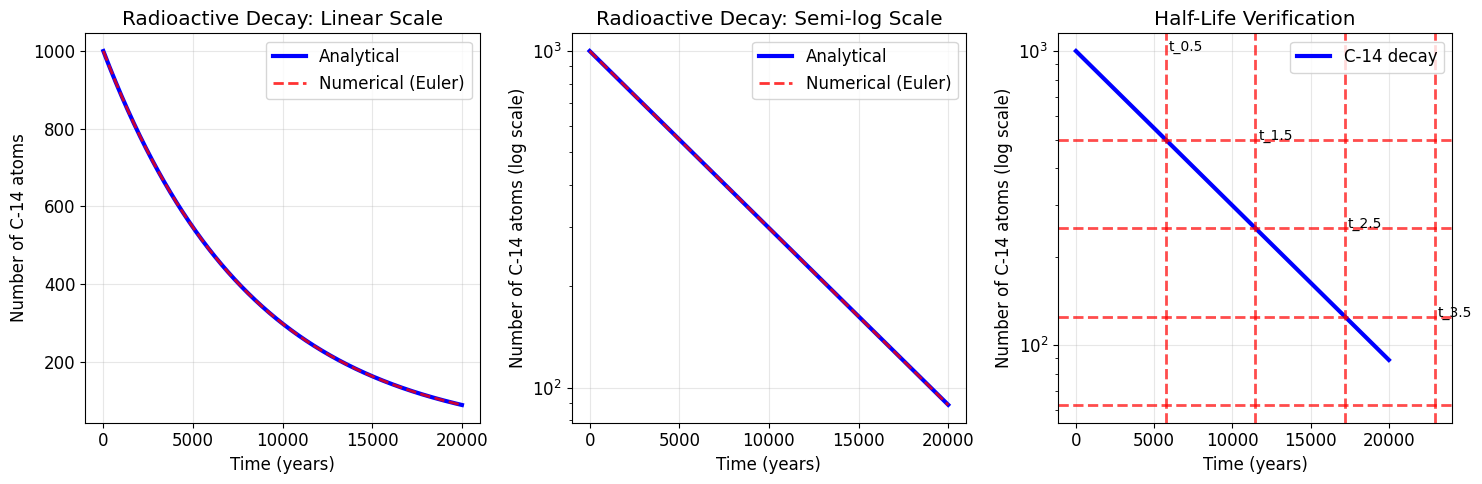

CARBON-14 DATING EXAMPLE:
If a sample has 25% of original C-14:
Calculated age: 11460 years
Number of half-lives: 2.00

--- Physics Application 2: Terminal Velocity with Air Resistance ---

--- Interactive Parameter Exploration ---
Use the sliders below to explore how mass and drag affect terminal velocity:


interactive(children=(FloatSlider(value=0.1, description='Mass (kg):', max=0.5, min=0.05, step=0.01), FloatSli…

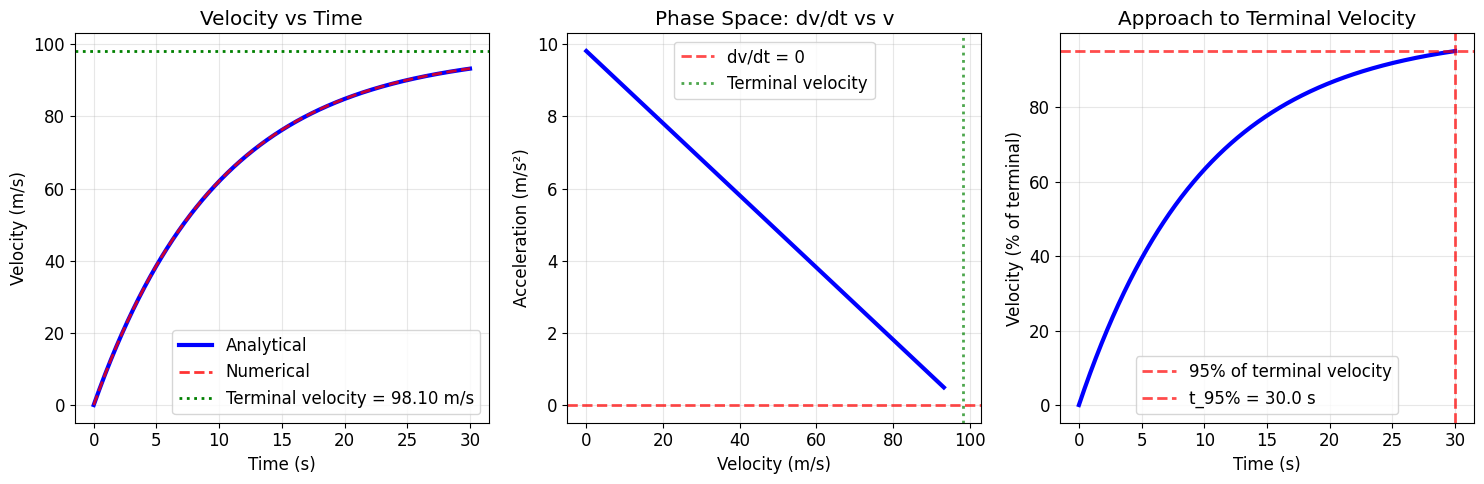

Terminal velocity: 98.100 m/s
Time constant (m/b): 10.00 s
Time to reach 95%: 29.96 s


In [ ]:
# Physics Application 1: Radioactive Decay
print("\n--- Physics Application 1: Radioactive Decay ---")

# Carbon-14 dating example
def radioactive_decay_model():
    """Model radioactive decay of Carbon-14."""
    # Carbon-14 parameters
    half_life = 5730  # years
    lambda_c14 = np.log(2) / half_life  # decay constant

    # Initial conditions
    N0 = 1000  # initial number of C-14 atoms (arbitrary units)
    t_span = (0, 20000)  # 20,000 years

    def decay_equation(t, N):
        """dN/dt = -λN"""
        return -lambda_c14 * N

    # Analytical solution
    def analytical_decay(t):
        return N0 * np.exp(-lambda_c14 * t)

    return decay_equation, t_span, N0, analytical_decay, lambda_c14

decay_eq, t_span, N0, analytical_func, lambda_c14 = radioactive_decay_model()

# Numerical solution
t_decay, N_numerical = euler_method(decay_eq, t_span, N0, 2000)

# Analytical solution
t_analytical = np.linspace(t_span[0], t_span[1], 1000)
N_analytical = analytical_func(t_analytical)

# Plotting
plt.figure(figsize=(15, 5))

# Linear scale
plt.subplot(1, 3, 1)
plt.plot(t_analytical, N_analytical, 'b-', linewidth=3, label='Analytical')
plt.plot(t_decay, N_numerical, 'r--', linewidth=2, alpha=0.8, label='Numerical (Euler)')
plt.xlabel('Time (years)')
plt.ylabel('Number of C-14 atoms')
plt.title('Radioactive Decay: Linear Scale')
plt.legend()
plt.grid(True)

# Semi-log scale
plt.subplot(1, 3, 2)
plt.semilogy(t_analytical, N_analytical, 'b-', linewidth=3, label='Analytical')
plt.semilogy(t_decay, N_numerical, 'r--', linewidth=2, alpha=0.8, label='Numerical (Euler)')
plt.xlabel('Time (years)')
plt.ylabel('Number of C-14 atoms (log scale)')
plt.title('Radioactive Decay: Semi-log Scale')
plt.legend()
plt.grid(True)

# Half-life verification
plt.subplot(1, 3, 3)
# Mark half-lives
half_lives = np.array([1, 2, 3, 4]) * 5730
N_half_lives = N0 * (0.5)**np.array([1, 2, 3, 4])

plt.semilogy(t_analytical, N_analytical, 'b-', linewidth=3, label='C-14 decay')
for i, (t_half, N_half) in enumerate(zip(half_lives, N_half_lives)):
    plt.axvline(x=t_half, color='red', linestyle='--', alpha=0.7)
    plt.axhline(y=N_half, color='red', linestyle='--', alpha=0.7)
    plt.text(t_half + 200, N_half * 2, f't_{i+1/2}', fontsize=10)

plt.xlabel('Time (years)')
plt.ylabel('Number of C-14 atoms (log scale)')
plt.title('Half-Life Verification')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate age of sample with known ratio
current_ratio = 0.25  # 25% of original C-14 remains
age_analytical = -np.log(current_ratio) / lambda_c14
print(f"CARBON-14 DATING EXAMPLE:")
print(f"If a sample has {current_ratio*100:.0f}% of original C-14:")
print(f"Calculated age: {age_analytical:.0f} years")
print(f"Number of half-lives: {age_analytical/5730:.2f}")

# Physics Application 2: Terminal Velocity with Air Resistance
print("\n--- Physics Application 2: Terminal Velocity with Air Resistance ---")

def terminal_velocity_model():
    """Model object falling with air resistance."""
    # Parameters for a falling sphere
    m = 0.1      # kg (mass)
    g = 9.80     # m/s^2 (gravity)
    b = 0.01     # kg/s (drag coefficient)

    # Terminal velocity (analytical)
    v_terminal = m * g / b

    def velocity_equation(t, v):
        """dv/dt = g - (b/m)v"""
        return g - (b/m) * v

    # Analytical solution: v(t) = v_terminal * (1 - exp(-bt/m))
    def analytical_velocity(t):
        return v_terminal * (1 - np.exp(-b * t / m))

    return velocity_equation, v_terminal, analytical_velocity, m, g, b

vel_eq, v_term, analytical_vel, mass, gravity, drag = terminal_velocity_model()

# Solve numerically
t_span_vel = (0, 30)  # 30 seconds
v0 = 0.0  # starts from rest
t_vel, v_numerical = euler_method(vel_eq, t_span_vel, v0, 3000)

# Analytical solution
t_vel_analytical = np.linspace(t_span_vel[0], t_span_vel[1], 1000)
v_analytical = analytical_vel(t_vel_analytical)

# Calculate position by integrating velocity
def position_from_velocity(t, v):
    """Calculate position by integrating velocity."""
    _, pos = cumulative_integration(t, v)
    return pos

pos_numerical = position_from_velocity(t_vel, v_numerical)
pos_analytical = position_from_velocity(t_vel_analytical, v_analytical)

# Interactive widget for parameter exploration
def plot_terminal_velocity(mass_slider, drag_slider):
    """Interactive plot for exploring parameter effects."""
    # Update parameters
    m_new = mass_slider
    b_new = drag_slider
    v_term_new = m_new * gravity / b_new

    def new_vel_eq(t, v):
        return gravity - (b_new/m_new) * v

    def new_analytical(t):
        return v_term_new * (1 - np.exp(-b_new * t / m_new))

    # Solve with new parameters
    t_new, v_new = euler_method(new_vel_eq, t_span_vel, v0, 1000)
    v_new_analytical = new_analytical(t_vel_analytical)

    # Plot
    plt.figure(figsize=(15, 5))

    # Velocity vs time
    plt.subplot(1, 3, 1)
    plt.plot(t_vel_analytical, v_new_analytical, 'b-', linewidth=3, label='Analytical')
    plt.plot(t_new, v_new, 'r--', linewidth=2, alpha=0.8, label='Numerical')
    plt.axhline(y=v_term_new, color='green', linestyle=':', linewidth=2, label=f'Terminal velocity = {v_term_new:.2f} m/s')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.title('Velocity vs Time')
    plt.legend()
    plt.grid(True)

    # Phase space plot
    plt.subplot(1, 3, 2)
    acceleration = gravity - (b_new/m_new) * v_new_analytical
    plt.plot(v_new_analytical, acceleration, 'b-', linewidth=3)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='dv/dt = 0')
    plt.axvline(x=v_term_new, color='green', linestyle=':', alpha=0.7, label='Terminal velocity')
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Acceleration (m/s²)')
    plt.title('Phase Space: dv/dt vs v')
    plt.legend()
    plt.grid(True)

    # Time to reach 95% of terminal velocity
    plt.subplot(1, 3, 3)
    time_95 = -(m_new/b_new) * np.log(0.05)  # Time to reach 95% of v_terminal
    plt.plot(t_vel_analytical, v_new_analytical/v_term_new * 100, 'b-', linewidth=3)
    plt.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% of terminal velocity')
    plt.axvline(x=time_95, color='red', linestyle='--', alpha=0.7, label=f't_95% = {time_95:.1f} s')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (% of terminal)')
    plt.title('Approach to Terminal Velocity')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print(f"Terminal velocity: {v_term_new:.3f} m/s")
    print(f"Time constant (m/b): {m_new/b_new:.2f} s")
    print(f"Time to reach 95%: {time_95:.2f} s")

# Create interactive widgets
mass_widget = widgets.FloatSlider(value=0.1, min=0.05, max=0.5, step=0.01, description='Mass (kg):')
drag_widget = widgets.FloatSlider(value=0.01, min=0.005, max=0.05, step=0.001, description='Drag coeff (kg/s):')

print("\n--- Interactive Parameter Exploration ---")
print("Use the sliders below to explore how mass and drag affect terminal velocity:")

widgets.interact(plot_terminal_velocity, mass_slider=mass_widget, drag_slider=drag_widget)

# Default plot with original parameters
plot_terminal_velocity(0.1, 0.01)


In [ ]:
# Physics Application 3: RC Circuit Charging
print("\n--- Physics Application 3: RC Circuit Charging ---")

def rc_circuit_model():
    """Model capacitor charging in RC circuit."""
    # Circuit parameters
    R = 10000  # Ohms (10 kΩ resistor)
    C = 100e-6  # Farads (100 μF capacitor)
    V_source = 12.0  # Volts (battery voltage)
    tau = R * C  # Time constant

    def charge_equation(t, Q):
        """dQ/dt = (V_source - Q/C) / R"""
        return (V_source - Q/C) / R

    def voltage_equation(t, V_C):
        """dV_C/dt = (V_source - V_C) / (RC)"""
        return (V_source - V_C) / tau

    # Analytical solutions
    def analytical_charge(t):
        """Q(t) = CV_source * (1 - exp(-t/τ))"""
        return C * V_source * (1 - np.exp(-t/tau))

    def analytical_voltage(t):
        """V_C(t) = V_source * (1 - exp(-t/τ))"""
        return V_source * (1 - np.exp(-t/tau))

    return charge_equation, voltage_equation, analytical_charge, analytical_voltage, R, C, V_source, tau

charge_eq, voltage_eq, analytical_Q, analytical_V, R, C, V_source, tau = rc_circuit_model()

# Solve for capacitor voltage
t_span_rc = (0, 5*tau)  # 5 time constants
V_C0 = 0.0  # Initially uncharged
t_rc, V_C_numerical = euler_method(voltage_eq, t_span_rc, V_C0, 2000)

# Analytical solution
t_rc_analytical = np.linspace(t_span_rc[0], t_span_rc[1], 1000)
V_C_analytical = analytical_V(t_rc_analytical)

# Calculate current: I = C * dV_C/dt
I_analytical = (V_source / R) * np.exp(-t_rc_analytical/tau)

# Numerical current (using forward difference)
t_current, I_numerical = forward_difference(t_rc, V_C_numerical)
I_numerical = C * I_numerical  # Convert dV/dt to current

plt.figure(figsize=(15, 5))

# Capacitor voltage
plt.subplot(1, 3, 1)
plt.plot(t_rc_analytical/tau, V_C_analytical, 'b-', linewidth=3, label='Analytical')
plt.plot(t_rc/tau, V_C_numerical, 'r--', linewidth=2, alpha=0.8, label='Numerical')
plt.axhline(y=V_source, color='green', linestyle=':', label=f'V_source = {V_source} V')
plt.axhline(y=0.632*V_source, color='orange', linestyle='--', alpha=0.7, label='63.2% of V_source')
plt.axvline(x=1, color='orange', linestyle='--', alpha=0.7, label='t = τ')
plt.xlabel('Time (in units of τ)')
plt.ylabel('Capacitor Voltage (V)')
plt.title('RC Circuit: Capacitor Charging')
plt.legend()
plt.grid(True)

# Current
plt.subplot(1, 3, 2)
plt.plot(t_rc_analytical/tau, I_analytical*1000, 'b-', linewidth=3, label='Analytical')
plt.plot(t_current/tau, I_numerical*1000, 'r--', linewidth=2, alpha=0.8, label='Numerical')
plt.xlabel('Time (in units of τ)')
plt.ylabel('Current (mA)')
plt.title('RC Circuit: Current vs Time')
plt.legend()
plt.grid(True)

# Energy stored in capacitor
plt.subplot(1, 3, 3)
E_C_analytical = 0.5 * C * V_C_analytical**2
E_C_numerical = 0.5 * C * V_C_numerical**2
plt.plot(t_rc_analytical/tau, E_C_analytical*1e6, 'b-', linewidth=3, label='Analytical')
plt.plot(t_rc/tau, E_C_numerical*1e6, 'r--', linewidth=2, alpha=0.8, label='Numerical')
plt.xlabel('Time (in units of τ)')
plt.ylabel('Energy Stored (μJ)')
plt.title('Energy Stored in Capacitor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"RC CIRCUIT ANALYSIS:")
print(f"Time constant τ = RC = {tau*1000:.1f} ms")
print(f"Final capacitor voltage: {V_source:.1f} V")
print(f"Initial current: {V_source/R*1000:.2f} mA")
print(f"Final energy stored: {0.5*C*V_source**2*1e6:.1f} μJ")



# SECTION 4: SECOND-ORDER ORDINARY DIFFERENTIAL EQUATIONS


MOTIVATION FROM PHYSICS:
Second-order ODEs describe fundamental physics phenomena:
- Harmonic oscillators (springs, pendulums, LC circuits)
- Projectile motion with air resistance
- Wave equations and vibrations
- Planetary motion and celestial mechanics

These equations often lack analytical solutions, making numerical methods essential
for realistic physics problems.

KEY CONCEPTS:
- Converting second-order ODEs to systems of first-order ODEs
- Applying Euler's method to systems
- Understanding phase space and trajectories
- Energy conservation and numerical stability



--- Physics Application 1: Damped Harmonic Oscillator ---
DAMPED OSCILLATOR PARAMETERS:
Mass: 1.0 kg, Spring constant: 4.0 N/m, Damping: 0.5 kg/s
Natural frequency ω₀: 2.000 rad/s
Damping parameter γ: 0.250 s⁻¹
Damping regime: Underdamped
Damped frequency ωd: 1.984 rad/s


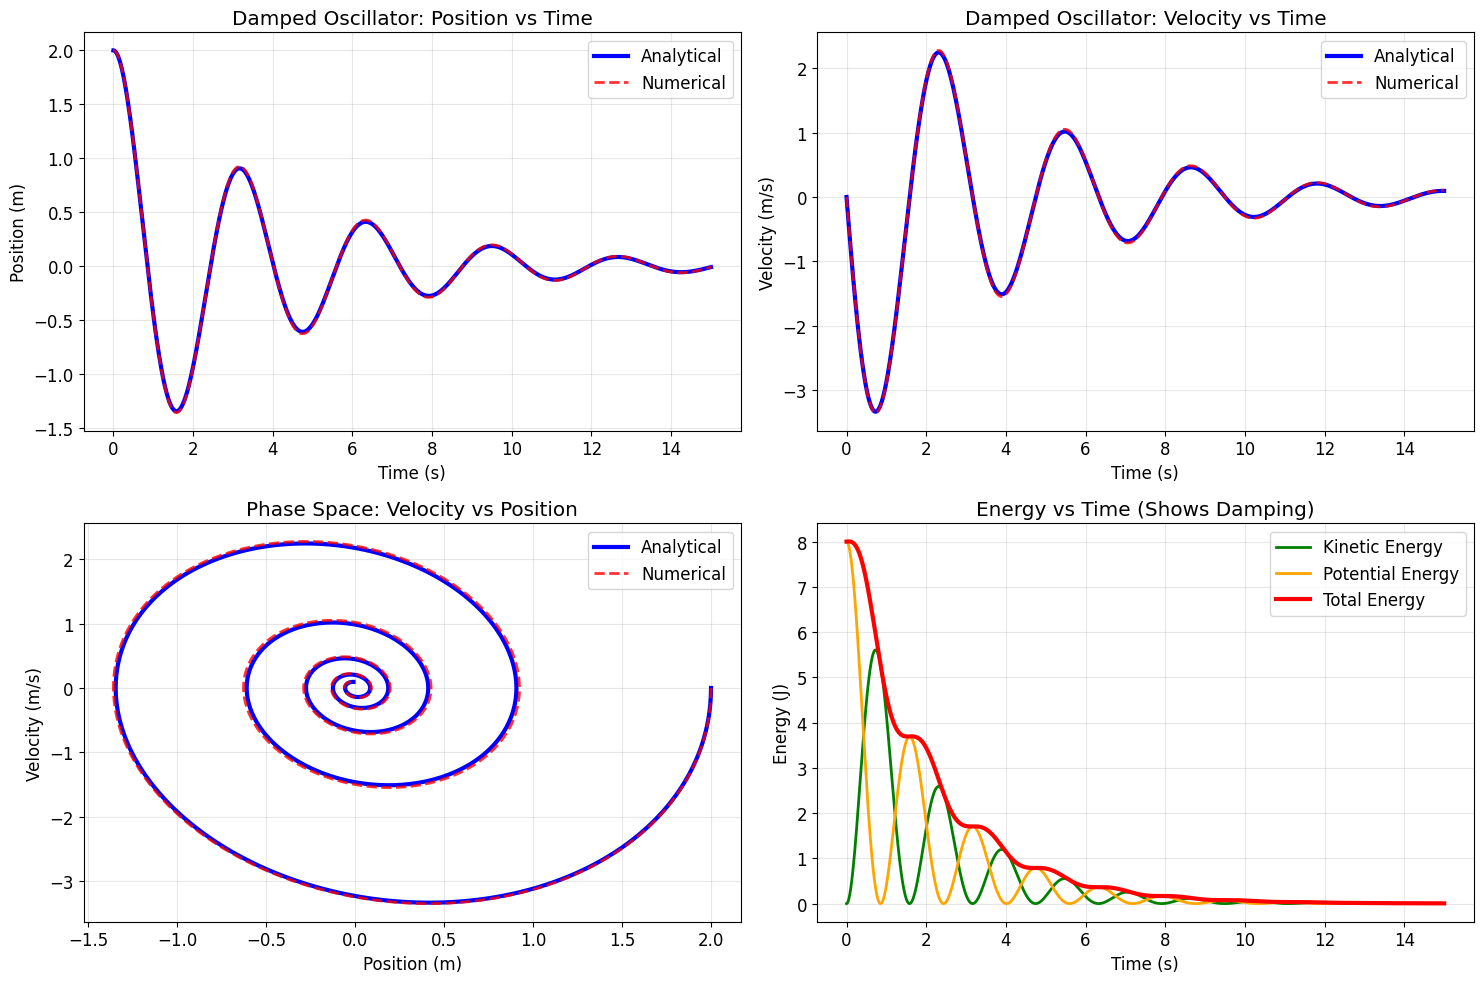


ENERGY ANALYSIS:
Initial total energy: 8.0000 J
Final total energy: 0.0055 J
Energy lost to damping: 7.9945 J (99.9%)

--- Physics Application 2: Projectile Motion with Air Resistance ---
PROJECTILE MOTION COMPARISON:
Launch speed: 30.0 m/s at 45°
Drag parameter k: 0.005757 m⁻¹

Without air resistance:
  Range: 91.7 m
  Flight time: 4.32 s

With air resistance:
  Range: 66.2 m (72.2% of ideal)


In [ ]:
def euler_system(f_system, t_span, y0, n_steps):
    """
    Solve system of first-order ODEs using Euler's method.

    Parameters:
    f_system : function
        Right-hand side function f(t, y) where y is a vector
    t_span : tuple
        (t_start, t_end) integration interval
    y0 : array
        Initial conditions [y1(0), y2(0), ...]
    n_steps : int
        Number of integration steps

    Returns:
    t : array
        Time values
    y : array
        Solution array (n_steps+1, len(y0))
    """
    t_start, t_end = t_span
    h = (t_end - t_start) / n_steps

    # Initialize arrays
    t = np.linspace(t_start, t_end, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0

    # Euler's method for systems
    for i in range(n_steps):
        dydt = f_system(t[i], y[i])
        y[i + 1] = y[i] + h * dydt

    return t, y

# Physics Application 1: Damped Harmonic Oscillator
print("\n--- Physics Application 1: Damped Harmonic Oscillator ---")

def damped_oscillator_model():
    """Model damped harmonic oscillator: m*d²x/dt² + c*dx/dt + k*x = 0"""
    # Physical parameters
    m = 1.0    # kg (mass)
    k = 4.0    # N/m (spring constant)
    c = 0.5    # kg/s (damping coefficient)

    # Derived parameters
    omega0 = np.sqrt(k/m)  # Natural frequency
    gamma = c/(2*m)        # Damping parameter

    # Determine damping regime
    if gamma < omega0:
        regime = "Underdamped"
        omega_d = np.sqrt(omega0**2 - gamma**2)  # Damped frequency
    elif gamma == omega0:
        regime = "Critically damped"
        omega_d = 0
    else:
        regime = "Overdamped"
        omega_d = 0

    def oscillator_system(t, y):
        """
        Convert second-order ODE to system of first-order ODEs:
        Let y[0] = x (position), y[1] = dx/dt (velocity)
        Then: dy[0]/dt = y[1]
              dy[1]/dt = -(k/m)*y[0] - (c/m)*y[1]
        """
        x, v = y[0], y[1]
        dxdt = v
        dvdt = -(k/m)*x - (c/m)*v
        return np.array([dxdt, dvdt])

    # Analytical solution for underdamped case
    def analytical_solution(t, x0, v0):
        """Analytical solution for underdamped oscillator"""
        if gamma < omega0:
            A = x0
            B = (v0 + gamma*x0) / omega_d
            x_analytical = np.exp(-gamma*t) * (A*np.cos(omega_d*t) + B*np.sin(omega_d*t))
            v_analytical = np.exp(-gamma*t) * ((-gamma*A + B*omega_d)*np.cos(omega_d*t) +
                                             (-gamma*B - A*omega_d)*np.sin(omega_d*t))
            return x_analytical, v_analytical
        else:
            # For overdamped/critically damped, return None (more complex)
            return None, None

    return oscillator_system, analytical_solution, m, k, c, omega0, gamma, regime, omega_d

osc_system, analytical_osc, m, k, c, omega0, gamma, regime, omega_d = damped_oscillator_model()

# Initial conditions
x0 = 2.0   # Initial displacement (m)
v0 = 0.0   # Initial velocity (m/s)
y0 = np.array([x0, v0])

# Solve numerically
t_span_osc = (0, 15)
t_osc, y_osc = euler_system(osc_system, t_span_osc, y0, 5000)
x_numerical = y_osc[:, 0]
v_numerical = y_osc[:, 1]

# Analytical solution (if underdamped)
t_analytical = np.linspace(t_span_osc[0], t_span_osc[1], 1000)
x_analytical, v_analytical = analytical_osc(t_analytical, x0, v0)

print(f"DAMPED OSCILLATOR PARAMETERS:")
print(f"Mass: {m} kg, Spring constant: {k} N/m, Damping: {c} kg/s")
print(f"Natural frequency ω₀: {omega0:.3f} rad/s")
print(f"Damping parameter γ: {gamma:.3f} s⁻¹")
print(f"Damping regime: {regime}")
if regime == "Underdamped":
    print(f"Damped frequency ωd: {omega_d:.3f} rad/s")

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Position vs time
axes[0, 0].plot(t_analytical, x_analytical, 'b-', linewidth=3, label='Analytical')
axes[0, 0].plot(t_osc, x_numerical, 'r--', linewidth=2, alpha=0.8, label='Numerical')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Position (m)')
axes[0, 0].set_title('Damped Oscillator: Position vs Time')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Velocity vs time
axes[0, 1].plot(t_analytical, v_analytical, 'b-', linewidth=3, label='Analytical')
axes[0, 1].plot(t_osc, v_numerical, 'r--', linewidth=2, alpha=0.8, label='Numerical')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Velocity (m/s)')
axes[0, 1].set_title('Damped Oscillator: Velocity vs Time')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Phase space (velocity vs position)
axes[1, 0].plot(x_analytical, v_analytical, 'b-', linewidth=3, label='Analytical')
axes[1, 0].plot(x_numerical, v_numerical, 'r--', linewidth=2, alpha=0.8, label='Numerical')
axes[1, 0].set_xlabel('Position (m)')
axes[1, 0].set_ylabel('Velocity (m/s)')
axes[1, 0].set_title('Phase Space: Velocity vs Position')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Energy vs time
E_kinetic = 0.5 * m * v_numerical**2
E_potential = 0.5 * k * x_numerical**2
E_total = E_kinetic + E_potential

axes[1, 1].plot(t_osc, E_kinetic, 'g-', linewidth=2, label='Kinetic Energy')
axes[1, 1].plot(t_osc, E_potential, 'orange', linewidth=2, label='Potential Energy')
axes[1, 1].plot(t_osc, E_total, 'r-', linewidth=3, label='Total Energy')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Energy (J)')
axes[1, 1].set_title('Energy vs Time (Shows Damping)')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Energy loss analysis
initial_energy = E_total[0]
final_energy = E_total[-1]
print(f"\nENERGY ANALYSIS:")
print(f"Initial total energy: {initial_energy:.4f} J")
print(f"Final total energy: {final_energy:.4f} J")
print(f"Energy lost to damping: {initial_energy - final_energy:.4f} J ({(1-final_energy/initial_energy)*100:.1f}%)")

# Physics Application 2: Projectile Motion with Air Resistance
print("\n--- Physics Application 2: Projectile Motion with Air Resistance ---")

def projectile_with_drag_model():
    """Model projectile motion with quadratic air resistance."""
    # Physical parameters
    g = 9.80      # m/s^2 (gravity)
    rho = 1.225   # kg/m^3 (air density at sea level)
    Cd = 0.47     # Drag coefficient (sphere)
    A = 0.01      # m^2 (cross-sectional area)
    m = 0.5       # kg (mass)

    # Drag parameter
    k_drag = 0.5 * rho * Cd * A / m

    def projectile_system(t, y):
        """
        Projectile motion with air resistance:
        y[0] = x position, y[1] = y position
        y[2] = x velocity, y[3] = y velocity
        """
        x, y_pos, vx, vy = y[0], y[1], y[2], y[3]

        # Speed for drag calculation
        speed = np.sqrt(vx**2 + vy**2)

        # Drag force components (proportional to v²)
        if speed > 0:
            drag_x = -k_drag * speed * vx
            drag_y = -k_drag * speed * vy
        else:
            drag_x = drag_y = 0

        # Equations of motion
        dxdt = vx
        dydt = vy
        dvxdt = drag_x
        dvydt = -g + drag_y

        return np.array([dxdt, dydt, dvxdt, dvydt])

    return projectile_system, k_drag, g

proj_system, k_drag, g = projectile_with_drag_model()

# Launch parameters
v0 = 30.0           # m/s initial speed
theta = 45.0 * np.pi/180  # launch angle
x0, y0 = 0.0, 0.0         # initial position

# Initial conditions: [x, y, vx, vy]
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)
y0_proj = np.array([x0, y0, vx0, vy0])

# Solve with air resistance
t_span_proj = (0, 8)  # 8 seconds should be enough
t_proj, y_proj = euler_system(proj_system, t_span_proj, y0_proj, 8000)

# Extract trajectories
x_drag = y_proj[:, 0]
y_drag = y_proj[:, 1]
vx_drag = y_proj[:, 2]
vy_drag = y_proj[:, 3]

# Find landing point (when y crosses zero after launch)
landing_indices = np.where((y_drag[1:] <= 0) & (y_drag[:-1] > 0))[0]
if len(landing_indices) > 0:
    landing_idx = landing_indices[0] + 1
    landing_time = t_proj[landing_idx]
    landing_distance = x_drag[landing_idx]
else:
    landing_time = t_proj[-1]
    landing_distance = x_drag[-1]

# Analytical solution without air resistance (for comparison)
t_no_drag = np.linspace(0, landing_time, 1000)
x_no_drag = vx0 * t_no_drag
y_no_drag = y0 + vy0 * t_no_drag - 0.5 * g * t_no_drag**2
vx_no_drag = vx0 * np.ones_like(t_no_drag)
vy_no_drag = vy0 - g * t_no_drag

# Analytical landing (no drag)
t_land_no_drag = 2 * vy0 / g
x_land_no_drag = vx0 * t_land_no_drag

print(f"PROJECTILE MOTION COMPARISON:")
print(f"Launch speed: {v0:.1f} m/s at {theta*180/np.pi:.0f}°")
print(f"Drag parameter k: {k_drag:.6f} m⁻¹")
print(f"\nWithout air resistance:")
print(f"  Range: {x_land_no_drag:.1f} m")
print(f"  Flight time: {t_land_no_drag:.2f} s")
print(f"\nWith air resistance:")
print(f"  Range: {landing_distance:.1f} m ({landing_distance/x_land_no_drag*100:.1f}% of ideal)")
